## 📍 Table of Contents
1. [Data Loading & Inspection](#data-loading)
2. [Price Cleaning](#price-cleaning)
3. [Feature Analysis](#feature-analysis)
4. [Missing Values](#missing-values)

## Data Loading

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")


In [44]:
df= pd.read_csv('../data/raw/airbnb.csv',encoding='latin1',low_memory=False)


In [45]:
df.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [46]:
df.shape

(279712, 33)

 there are 33 columns and 279712 rows


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   listing_id                   279712 non-null  int64  
 1   name                         279537 non-null  object 
 2   host_id                      279712 non-null  int64  
 3   host_since                   279547 non-null  object 
 4   host_location                278872 non-null  object 
 5   host_response_time           150930 non-null  object 
 6   host_response_rate           150930 non-null  float64
 7   host_acceptance_rate         166625 non-null  float64
 8   host_is_superhost            279547 non-null  object 
 9   host_total_listings_count    279547 non-null  float64
 10  host_has_profile_pic         279547 non-null  object 
 11  host_identity_verified       279547 non-null  object 
 12  neighbourhood                279712 non-null  object 
 13 

numerical columns:listing_id ,host_id,host_response_rate,host acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_clealiness,review_score_chekin,review_scores_communication,review_scores_value,review_scores_locations

In [48]:
df.describe()

,listing_id,host_id,host_response_rate,host_acceptance_rate,host_total_listings_count,latitude,longitude,accommodates,bedrooms,price,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
count,2.797120e+05,2.797120e+05,150930.000000,166625.000000,279547.000000,279712.000000,279712.000000,279712.000000,250277.000000,279712.000000,279712.000000,2.797120e+05,188307.000000,187999.000000,188047.000000,187941.000000,188025.000000,187937.000000,187927.000000
mean,2.638196e+07,1.081658e+08,0.865939,0.827168,24.581612,18.761862,12.595075,3.288736,1.515509,608.792737,8.050967,2.755860e+04,93.405195,9.565476,9.312869,9.701534,9.698593,9.633994,9.335364
std,1.442576e+07,1.108570e+08,0.283744,0.289202,284.041143,32.560343,73.081309,2.133379,1.153080,3441.826611,31.518946,7.282875e+06,10.070437,0.990878,1.146072,0.867434,0.886884,0.833234,1.042625
min,2.577000e+03,1.822000e+03,0.000000,0.000000,0.000000,-34.264400,-99.339630,0.000000,1.000000,0.000000,1.000000,1.000000e+00,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
25%,1.384462e+07,1.720656e+07,0.900000,0.780000,1.000000,-22.964390,-43.198040,2.000000,1.000000,75.000000,1.000000,4.500000e+01,91.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000
50%,2.767098e+07,5.826911e+07,1.000000,0.980000,1.000000,40.710785,2.382780,2.000000,1.000000,150.000000,2.000000,1.125000e+03,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
75%,3.978485e+07,1.832853e+08,1.000000,1.000000,4.000000,41.908610,28.986730,4.000000,2.000000,474.000000,5.000000,1.125000e+03,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
max,4.834353e+07,3.901874e+08,1.000000,1.000000,7235.000000,48.904910,151.339810,16.000000,50.000000,625216.000000,9999.000000,2.147484e+09,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


prices:mean=608.792737

range=[0,625216]


## Price Cleaning

In [49]:
df["price"]

0          53
1         120
2          89
3          58
4          60
         ... 
279707    120
279708     60
279709     50
279710    105
279711     70
Name: price, Length: 279712, dtype: int64

In [50]:
upper_limit = df["price"].quantile(0.99)
df = df[df["price"] <= upper_limit]


i removed extreme outliers(

In [ ]:
plt.figure(figsize=(8,5))
plt.hist(df["price"], bins=50)
plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()


In [33]:
df["log_price"] = np.log1p(df["price"])


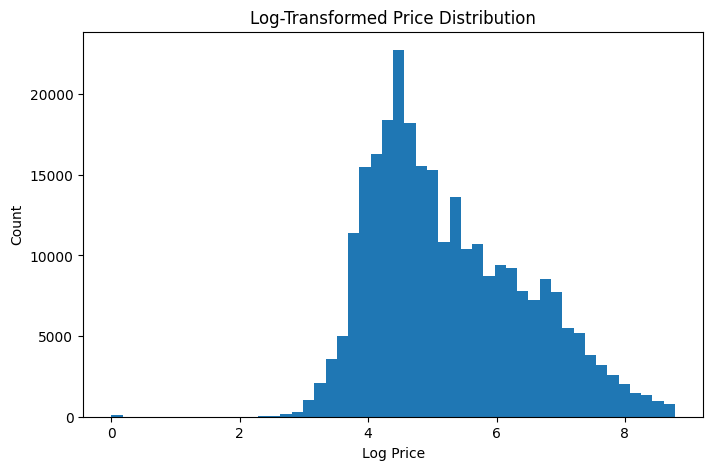

In [34]:
plt.figure(figsize=(8,5))
plt.hist(df["log_price"], bins=50)
plt.title("Log-Transformed Price Distribution")
plt.xlabel("Log Price")
plt.ylabel("Count")
plt.show()


I applied a log transformation to the price because the original distribution was highly right-skewed. This transformation normalizes the target variable, reduces the impact of extreme outliers, and helps the model better capture percentage-based relationships in the data

## Feature Analysis

In [35]:
numeric_features = df.select_dtypes(include=["int64", "float64"]).columns
categorical_features = df.select_dtypes(include=["object"]).columns


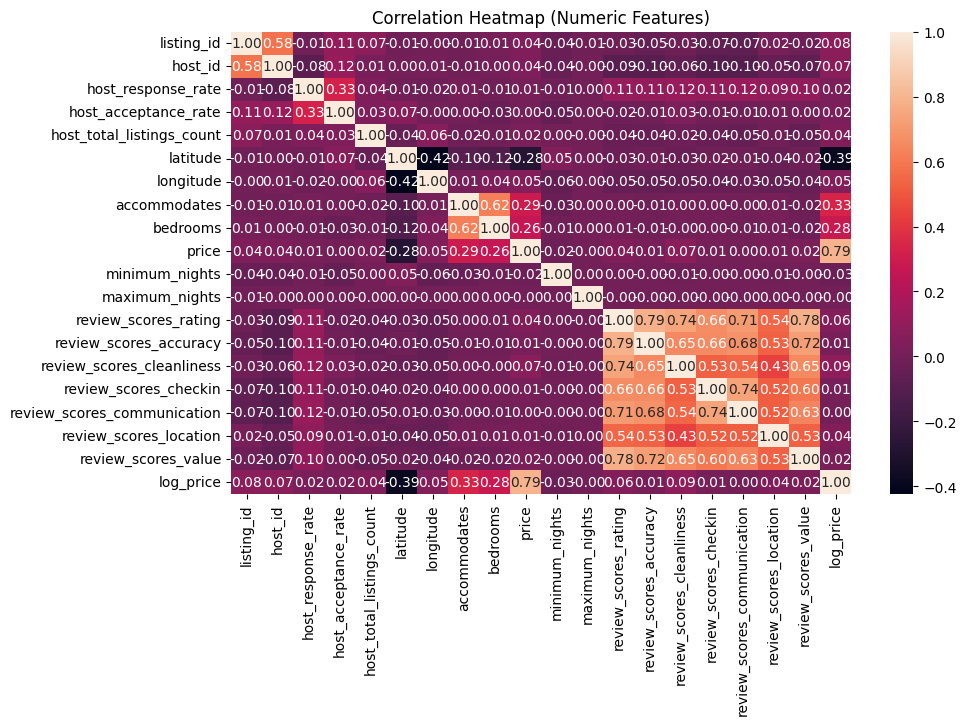

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(df[numeric_features].corr(), annot=True, fmt=".2f")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


, the capacity of the listing is the primary driver of cost. More beds = higher price


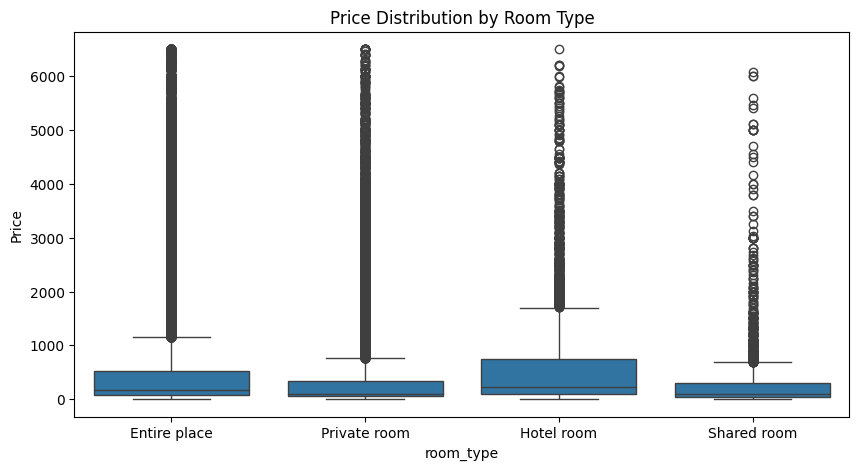

In [38]:
plt.figure(figsize=(10,5))
sns.boxplot(x="room_type", y="price", data=df)
plt.title("Price Distribution by Room Type")
plt.ylabel("Price")
plt.show()


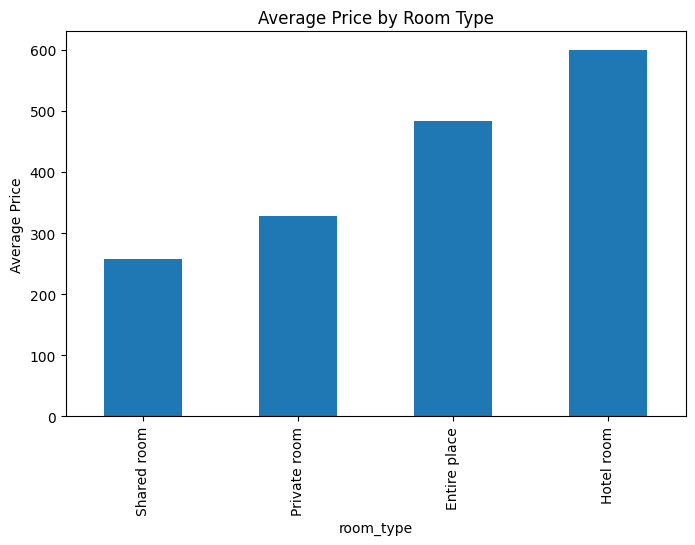

In [40]:
avg_price = df.groupby("room_type")["price"].mean().sort_values()

avg_price.plot(kind="bar", figsize=(8,5))
plt.title("Average Price by Room Type")
plt.ylabel("Average Price")
plt.show()


hotel room are more expensive

## Missing Values

In [41]:
missing_percent = df.isna().mean().sort_values(ascending=False) * 100
missing_percent


district                       86.643055
host_response_time             46.184839
host_response_rate             46.184839
host_acceptance_rate           40.455689
review_scores_value            32.551708
review_scores_location         32.548098
review_scores_checkin          32.546654
review_scores_accuracy         32.526075
review_scores_communication    32.516689
review_scores_cleanliness      32.508746
review_scores_rating           32.417767
bedrooms                       10.587500
host_location                   0.296043
name                            0.062097
host_has_profile_pic            0.059570
host_is_superhost               0.059570
host_total_listings_count       0.059570
host_since                      0.059570
host_identity_verified          0.059570
listing_id                      0.000000
property_type                   0.000000
longitude                       0.000000
neighbourhood                   0.000000
host_id                         0.000000
latitude        

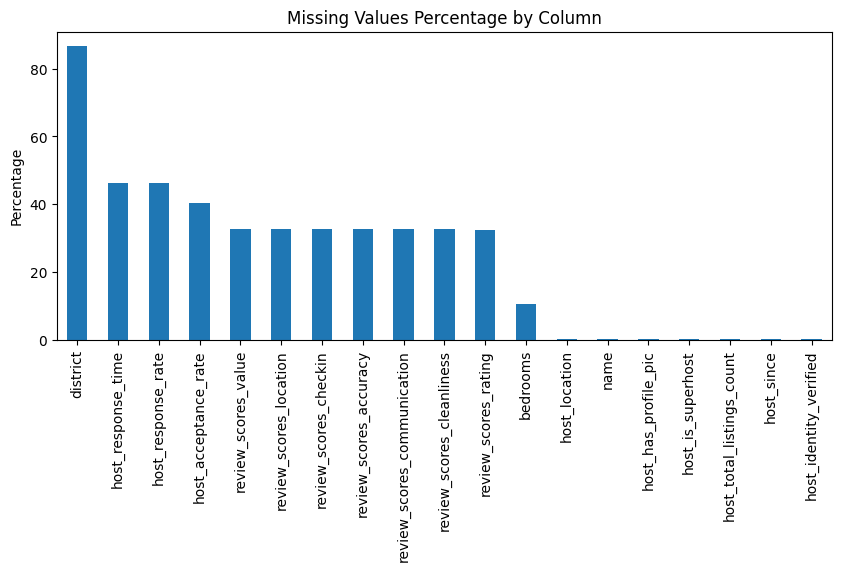

In [42]:
missing_percent[missing_percent > 0].plot(kind="bar", figsize=(10,4))
plt.title("Missing Values Percentage by Column")
plt.ylabel("Percentage")
plt.show()


district column is missing over 80% of its data.
=> i should  drop this column. When more than half of a column is missing, "guessing" (imputing) the values introduces too much bias
bedrooms is missing roughly 10% of its data.
=> i could impute the missing values

eview_scores_value, location, cleanliness, etc: all missing about 30–35% of their data.
=>imputing these with the "Median" score